In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

# model do estymacji
najlepszym przykładem będzie model poruszający się w prostej lini z zmienną prędkością

In [2]:
pos = 100
v = 6
a = 2
time = 30

data = []

for s in range(time):
    data.append(pos)
    pos += 0.5*a*(s**2) + v*s
    v += a

measured_data = [d + random.uniform(-3,3)*0.01*d for d in data]
display(data)
measured_data

[100,
 100.0,
 109.0,
 133.0,
 178.0,
 250.0,
 355.0,
 499.0,
 688.0,
 928.0,
 1225.0,
 1585.0,
 2014.0,
 2518.0,
 3103.0,
 3775.0,
 4540.0,
 5404.0,
 6373.0,
 7453.0,
 8650.0,
 9970.0,
 11419.0,
 13003.0,
 14728.0,
 16600.0,
 18625.0,
 20809.0,
 23158.0,
 25678.0]

[101.11896810037781,
 97.67004282070438,
 111.62296948139196,
 133.264134308643,
 173.8646635609687,
 257.2362724902785,
 346.9638267507415,
 503.83800806103807,
 677.6314253899793,
 909.9711721352935,
 1211.1316635302267,
 1549.843573603377,
 1992.0704956352552,
 2446.3556494283844,
 3031.806060146107,
 3722.767999342162,
 4528.891362305887,
 5281.459304672036,
 6284.644273455701,
 7286.282547877869,
 8741.133650576681,
 9764.068116047803,
 11210.87674515995,
 12989.874980722052,
 14477.790072324065,
 16209.327623998026,
 18752.029999342187,
 21307.79127992514,
 23509.880671462673,
 24996.427430437565]

## tworzenie filtru alfa

In [3]:
def alfa_filter(data,alfa):

    filtered = [data[0]]
    x = data[0]
    for i in range(1,len(data)):
        x = x + alfa*(data[i] - x)
        filtered.append(x)

    return filtered


# Estymacja na przykładowych danych

## pokazanie estymacji w kolejnych krokach

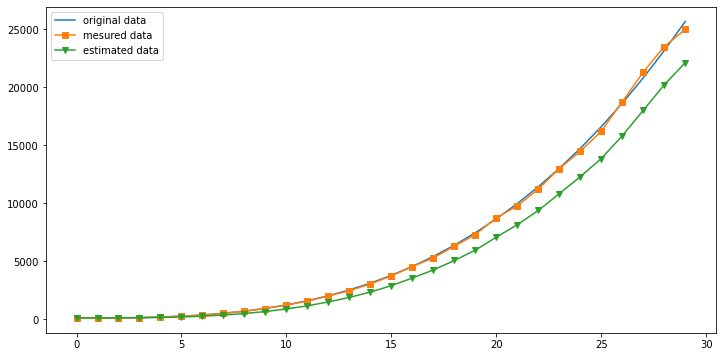

In [4]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(len(data)),data,label='original data')
plt.plot(np.arange(len(data)),measured_data,marker='s',label='mesured data')
plt.plot(np.arange(len(data)),alfa_filter(measured_data,0.4),marker='v',label='estimated data')
plt.legend()
plt.show()

### porówanie zaszumionych wartości z wyestymowanymi

In [5]:
compare = pd.DataFrame([data, alfa_filter(data,0.5)])
compare = compare.transpose()
compare.columns = ['original','filtered']
compare

,original,filtered
0,100.0,100.000000
1,100.0,100.000000
2,109.0,104.500000
3,133.0,118.750000
4,178.0,148.375000
5,250.0,199.187500
6,355.0,277.093750
7,499.0,388.046875
8,688.0,538.023438
9,928.0,733.011719


## tworzenie filtru alfa - beta

In [6]:
def alfa_beta_filter(data,x0,xk0,alfa,beta,t):



    x = x0 + t * xk0
    xk = xk0

    filtered = []

    for i in range(len(data)):
        #state update
        x = x + alfa*(data[i]-x)
        xk = xk + beta*((data[i]-x)/t)

        filtered.append(x)

        #predict
        x = x + t * xk
        xk = xk

    return filtered

## Użycie filtru alfa-beta na przykładzie

In [7]:
pos = 100
v = 6
a = 2
time = 30

filtered_data = alfa_beta_filter(measured_data,pos,v,0.5,0.6,time)
filtered_data

[190.5594840501889,
 207.28260865050333,
 189.73686453206466,
 168.35040637126903,
 167.43156029824627,
 210.5878727052065,
 291.0243259744397,
 426.46149349709515,
 604.2897402920763,
 831.376242591595,
 1119.0782183019305,
 1459.901194762162,
 1878.4088576605814,
 2348.903757398758,
 2906.111980235595,
 3567.9052852251953,
 4348.322433436948,
 5168.98565738658,
 6114.651847938865,
 7139.301808081143,
 8423.146561440706,
 9671.93229759684,
 11047.37022576627,
 12673.64026345014,
 14325.603243274654,
 16063.009557738716,
 18246.95932252062,
 20768.33604824952,
 23291.905676385424,
 25362.356368463996]

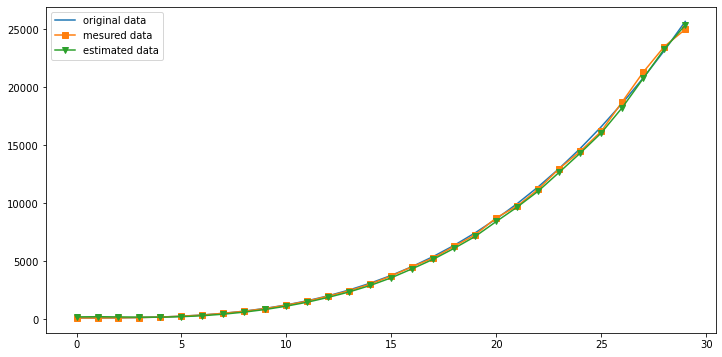

In [8]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(len(data)),data,label='original data')
plt.plot(np.arange(len(data)),measured_data,marker='s',label='mesured data')
plt.plot(np.arange(len(data)),filtered_data,marker='v',label='estimated data')
plt.legend()
plt.show()

# filrt alfa beta gamma

In [9]:
def alfa_beta_gamma_filter(data,x0,xk0,xkk0,alfa,beta,gamma,t):



    x = x0 + t * xk0 + xkk0 * ((t**2)/2)
    xk = xk0 + xkk0 * t
    xkk = xkk0

    filtered = []
    vel = []
    acc = []
    for i in range(len(data)):
        #state update
        x = x + alfa*(data[i]-x)
        xk = xk + beta*((data[i]-x)/t)
        xkk = xkk + gamma* ((data[i]-x)/(0.5*t*t))

        filtered.append(x)
        vel.append(xk)
        acc.append(xkk)
        #predict
        x = x + t * xk + xkk * ((t**2)/2)
        xk = xk + xkk * t
        xkk = xkk

    return filtered

### pokażmy użycie filtra alfa-beta-gamma na przykładzie

In [10]:
abg = alfa_beta_gamma_filter(measured_data,pos,v,0,0.6,0.6,0.1,time)

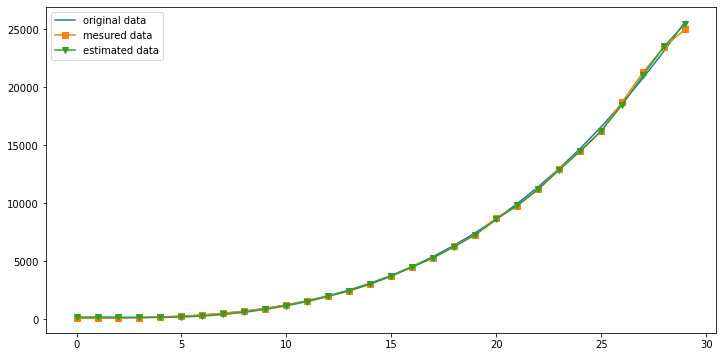

In [11]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(len(data)),data,label='original data')
plt.plot(np.arange(len(data)),measured_data,marker='s',label='mesured data')
plt.plot(np.arange(len(data)),abg,marker='v',label='estimated data')
plt.legend()
plt.show()

# filtr kalmana

In [12]:
def kaman_filter(data, x0, p0,q,r):

    x = x0
    p = p0

    filtered = []
    for z in data:
        #estimation
        k = p/(p+r)
        x = x +( k * (z-x))

        print(p)

        p = p + q
        filtered.append(x)

    return filtered

In [13]:
filtered_data_kalman= kaman_filter(measured_data,10,0.2,0.01,0.1)

0.2
0.21000000000000002
0.22000000000000003
0.23000000000000004
0.24000000000000005
0.25000000000000006
0.26000000000000006
0.2700000000000001
0.2800000000000001
0.2900000000000001
0.3000000000000001
0.3100000000000001
0.3200000000000001
0.3300000000000001
0.34000000000000014
0.35000000000000014
0.36000000000000015
0.37000000000000016
0.38000000000000017
0.3900000000000002
0.4000000000000002
0.4100000000000002
0.4200000000000002
0.4300000000000002
0.4400000000000002
0.45000000000000023
0.46000000000000024
0.47000000000000025
0.48000000000000026
0.49000000000000027


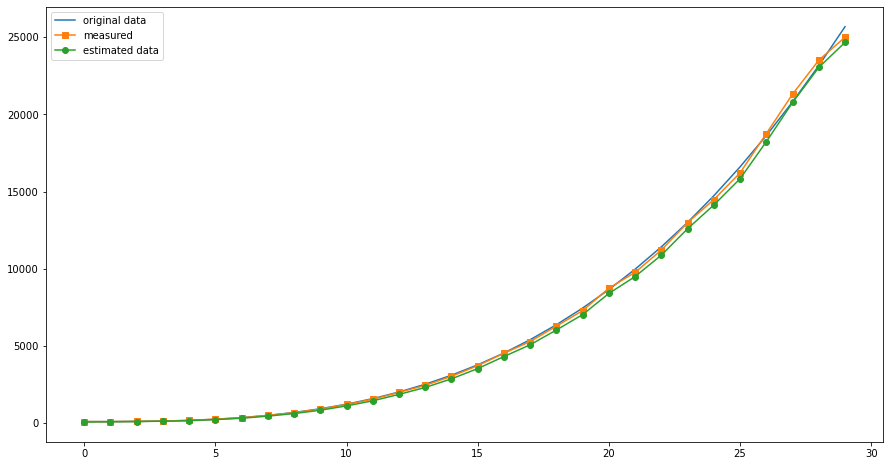

In [14]:
plt.figure(figsize=(15,8))
plt.plot(np.arange(len(data)),data, label='original data')
plt.plot(np.arange(len(measured_data)),measured_data, marker='s', label='measured')
plt.plot(np.arange(len(filtered_data_kalman)), filtered_data_kalman ,marker='o',label='estimated data')
plt.legend()

### porównanie fitrów

In [15]:
def Q(y, y_pred): #blad sredniokwadratowy
    return sum([(y_pred[i] - y[i]) ** 2 for i in range(len(y))]) / len(y)

In [16]:
print("blad średnio kwadratowy - filtr alfa: ", Q(data, alfa_filter(data,0.4)))
print("blad średnio kwadratowy - filtr alfa beta: ", Q(data, filtered_data))
print("blad średnio kwadratowy - filtr alfa beta gamma: ", Q(data, abg))
print("blad średnio kwadratowy - filtr kalmana: ", Q(data, filtered_data_kalman))

blad średnio kwadratowy - filtr alfa:  2348170.1330693075
blad średnio kwadratowy - filtr alfa beta:  52225.67495439807
blad średnio kwadratowy - filtr alfa beta gamma:  22004.963769833925
blad średnio kwadratowy - filtr kalmana:  119356.62573489816


In [17]:
def spb(y, y_pred): #Sredni procentowy blad
    return np.mean([np.abs((y[i] - y_pred[i]) / y[i]) * 100 for i in range(len(y))])

In [18]:
print("Sredni procentowy blad - filtr alfa: ", spb(data,alfa_filter(data,0.5)))
print("Sredni procentowy blad - filtr alfa beta: ", spb(data, filtered_data))
print("Sredni procentowy blad - filtr alfa: beta gamma", spb(data, abg))
print("Sredni procentowy blad - filtr kalmana: ", spb(data, filtered_data_kalman))

Sredni procentowy blad - filtr alfa:  13.619728638549713
Sredni procentowy blad - filtr alfa beta:  15.179424037734114
Sredni procentowy blad - filtr alfa: beta gamma 12.270353813645375
Sredni procentowy blad - filtr kalmana:  7.031457494484851


### oba kryteria jakości dowodzą że filtr kalmana jest najlepszy

### klamand 3 wymiarowy

In [19]:
class KalmanFilter:
    def __init__(self, data):
        self.X = np.array(data)
        self.pred = []


    def F(self, dt=1): #macierz stanu
        v = 1
        a = 0.5 * (1**2)
        F = np.array(
            [[1, 0, 0, v, 0, 0, a, 0, 0],
             [0, 1, 0, 0, v, 0, 0, a, 0],
             [0, 0, 1, 0, 0, v, 0, 0, a],
             [0, 0, 0, 1, 0, 0, v, 0, 0],
             [0, 0, 0, 0, 1, 0, 0, v, 0],
             [0, 0, 0, 0, 0, 1, 0, 0, v],
             [0, 0, 0, 0, 0, 0, 1, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 1, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 1]])
        return F


    def H(self): # macierz obserwacji
        return np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 1, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 1, 0, 0]])



    def Kalman_3D_est(self):

        N = len(self.X)
        Q = np.identity(9,np.float32) * 0.6
        F = self.F()
        R = np.identity(3)
        K = np.zeros((N, 9, 3))
        P = np.zeros((N, 9, 9))
        H = self.H()
        x_pred = np.zeros((N,9, 3))
        x_pred[0,0,0] = self.X[0,0]
        x_pred[0,3,1] = self.X[0,1]
        x_pred[0,6,2] = self.X[0,2]
        for n in range(1, len(self.X)):
            P[n] = np.dot(np.dot(F, P[n - 1]),F.T) + Q
            K[n] = np.dot(np.dot(P[n-1], H.T), np.linalg.inv(np.dot(np.dot(H,P[n - 1]),H.T)  + R))
            x_pred[n] = x_pred[n - 1] + np.dot(K[n],(self.X[n] - np.dot(H,x_pred[n - 1])))
        self.pred = x_pred
        return x_pred




In [20]:
class Thing:
    def __init__(self):
        self.pos = [1,0,11]
        self.v = [6,-5,8]
        self.a = [1,-1,1]
        self.a_change = np.array([1,2,3])
        self.czas = 0
        self.data = []

    def measure(self, N, szum_w = 1):
        szum = (sum(self.v) / 2) * szum_w / 100
        for _ in range(N):
            self.data.append(list(self.pos))
            self.data[-1][0] += np.random.random() * szum
            self.data[-1][1] += np.random.random() * szum
            self.data[-1][2] += np.random.random() * szum
            self.czas += 1
            for dim in range(2):
                self.pos[dim] += round((1 / 2) * self.a[dim]
                                       * (N ** 2) + self.v[dim] * (N), 3)
                self.v[dim] += round(self.a[dim], 3)
                self.a[dim] += round(self.a_change[dim], 3)

In [21]:
model = Thing()
model.measure(100)
dane = model.data
filtr = KalmanFilter(dane)
pred =filtr.Kalman_3D_est()

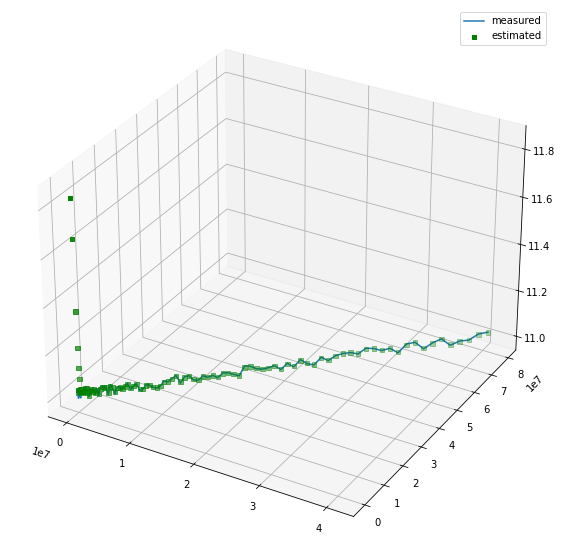

In [22]:
X = dane
plt.figure(figsize=(10,10))
ax = plt.axes(projection = '3d')


x1 = []
y1 = []
z1 = []

for i in range (len(X)):
    x1.append(X[i][0])
    y1.append(X[i][1])
    z1.append(X[i][2])


ax.plot3D(x1, y1,z1, label='measured')
x2 = pred[:,0,0]
y2 = pred[:,3,1]
z2 = pred[:,6,2]
ax.scatter3D(x2, y2, z2, color = "green", marker ="s",label='estimated')
plt.legend()
plt.show()